## Home Credit Default Risk Prediction

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

### 1. Data Preparation

In [1]:
import pandas as pd
%matplotlib inline
# use the %matplotlib inline command to show plots on the Jupyter Notebook
import matplotlib.pyplot as plt
import mysql.connector as sql

**Build the SQL connection**

In [2]:
db_connection = sql.connect(host='wcd-sql-class.c0h2bhc51r9d.us-east-1.rds.amazonaws.com', \
            database='credit', \
            user='student19', password='noisybutter764')

In [3]:
query="""
select
base.*,
base2.status_c_mean,
base2.status_x_mean,
base2.status_0_mean,
base2.status_1_mean,
base2.status_2_mean,
base2.status_3_mean,
base2.status_4_mean,
base2.status_5_mean,
base3.num_of_app,
base3.num_of_ref,
base3.avg_APP_CREDIT_PERC
from
(select a.*, 
AMT_CREDIT/AMT_ANNUITY as NEW_CREDIT_TO_ANNUITY_RATIO,
AMT_CREDIT/AMT_GOODS_PRICE as NEW_CREDIT_TO_GOODS_RATIO,
OWN_CAR_AGE/DAYS_BIRTH as NEW_CAR_TO_BIRTH_RATIO,
OWN_CAR_AGE/DAYS_EMPLOYED as NEW_CAR_TO_EMPLOY_RATIO,
AMT_CREDIT/AMT_INCOME_TOTAL as NEW_CREDIT_TO_INCOME_RATIO, -- one of the most important variable! DTI
AMT_ANNUITY/AMT_INCOME_TOTAL as NEW_ANNUITY_TO_INCOME_RATIO,
c.cl_max_DAYS_CREDIT,
c.cl_min_DAYS_CREDIT,
c.cl_avg_DAYS_CREDIT,
c.ac_max_DAYS_CREDIT,
c.ac_min_DAYS_CREDIT,
c.ac_avg_DAYS_CREDIT,
c.sd_max_DAYS_CREDIT,
c.sd_min_DAYS_CREDIT,
c.sd_avg_DAYS_CREDIT,
c.bd_max_DAYS_CREDIT,
c.bd_min_DAYS_CREDIT,
c.bd_avg_DAYS_CREDIT,
c.cl_max_CREDIT_DAY_OVERDUE,
c.ac_max_CREDIT_DAY_OVERDUE,
c.sd_max_CREDIT_DAY_OVERDUE,
c.bd_max_CREDIT_DAY_OVERDUE,
c.cl_avg_CREDIT_DAY_OVERDUE,
c.ac_avg_CREDIT_DAY_OVERDUE,
c.sd_avg_CREDIT_DAY_OVERDUE,
c.bd_avg_CREDIT_DAY_OVERDUE,
c.bd_flag,
c.bd_num
from
application as a
left join 
(
select SK_ID_CURR,
max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT else null end) as bd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_avg_DAYS_CREDIT,

max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_avg_DAYS_CREDIT_ENDDATE,

max(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE ='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_max_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_avg_CREDIT_DAY_OVERDUE,
max(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_flag, 
sum(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_num
from bureau
group by 1) as c
on a.SK_ID_CURR=c.SK_ID_CURR) as base
left join
(select a.SK_ID_CURR,
avg(case when status = 'C' then 1 else 0 end) as status_c_mean,
avg(case when status = 'X' then 1 else 0 end) as status_x_mean,
avg(case when status = '0' then 1 else 0 end) as status_0_mean,
avg(case when status = '1' then 1 else 0 end) as status_1_mean,
avg(case when status = '2' then 1 else 0 end) as status_2_mean,
avg(case when status = '3' then 1 else 0 end) as status_3_mean,
avg(case when status = '4' then 1 else 0 end) as status_4_mean,
avg(case when status = '5' then 1 else 0 end) as status_5_mean
from application as a
join bureau as b
on a.SK_ID_CURR=b.SK_ID_CURR
join bureau_balance as c
on b.SK_BUREAU_id=c.sk_id_bureau
group by 1) as base2 
on base.SK_ID_CURR=base2.SK_ID_CURR
left join
(select SK_ID_CURR,
sum(case when NAME_CONTRACT_STATUS in ('Approved','Unused offer') then 1 else 0 end) as num_of_app,
sum(case when NAME_CONTRACT_STATUS in ('Refused') then 1 else 0 end) as num_of_ref,
avg(case when NAME_CONTRACT_STATUS in ('Approved') then AMT_APPLICATION / AMT_CREDIT else null/*why use null?*/ end) as avg_APP_CREDIT_PERC
from previous_application group by 1) base3
on base.SK_ID_CURR=base3.SK_ID_CURR
"""

In [4]:
final = pd.read_sql(query, con=db_connection)

**The above code will take a long time to run, so I will divide them and try the following codes instead**

In [5]:
# base1
base = """
select a.*, 
AMT_CREDIT/AMT_ANNUITY as NEW_CREDIT_TO_ANNUITY_RATIO,
AMT_CREDIT/AMT_GOODS_PRICE as NEW_CREDIT_TO_GOODS_RATIO,
OWN_CAR_AGE/DAYS_BIRTH as NEW_CAR_TO_BIRTH_RATIO,
OWN_CAR_AGE/DAYS_EMPLOYED as NEW_CAR_TO_EMPLOY_RATIO,
AMT_CREDIT/AMT_INCOME_TOTAL as NEW_CREDIT_TO_INCOME_RATIO, -- one of the most important variable! DTI
AMT_ANNUITY/AMT_INCOME_TOTAL as NEW_ANNUITY_TO_INCOME_RATIO,
c.cl_max_DAYS_CREDIT,
c.cl_min_DAYS_CREDIT,
c.cl_avg_DAYS_CREDIT,
c.ac_max_DAYS_CREDIT,
c.ac_min_DAYS_CREDIT,
c.ac_avg_DAYS_CREDIT,
c.sd_max_DAYS_CREDIT,
c.sd_min_DAYS_CREDIT,
c.sd_avg_DAYS_CREDIT,
c.bd_max_DAYS_CREDIT,
c.bd_min_DAYS_CREDIT,
c.bd_avg_DAYS_CREDIT,
c.cl_max_CREDIT_DAY_OVERDUE,
c.ac_max_CREDIT_DAY_OVERDUE,
c.sd_max_CREDIT_DAY_OVERDUE,
c.bd_max_CREDIT_DAY_OVERDUE,
c.cl_avg_CREDIT_DAY_OVERDUE,
c.ac_avg_CREDIT_DAY_OVERDUE,
c.sd_avg_CREDIT_DAY_OVERDUE,
c.bd_avg_CREDIT_DAY_OVERDUE,
c.bd_flag,
c.bd_num
from
application as a
left join 
(
select SK_ID_CURR,
max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT else null end) as bd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_avg_DAYS_CREDIT,

max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_avg_DAYS_CREDIT_ENDDATE,

max(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE ='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_max_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_avg_CREDIT_DAY_OVERDUE,
max(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_flag, 
sum(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_num
from bureau
group by 1) as c
on a.SK_ID_CURR=c.SK_ID_CURR

"""

In [8]:
base = pd.read_sql(base, con=db_connection)

In [9]:
base.shape

(307511, 150)

In [10]:
#base2
base2 = """
select a.SK_ID_CURR,
avg(case when status = 'C' then 1 else 0 end) as status_c_mean,
avg(case when status = 'X' then 1 else 0 end) as status_x_mean,
avg(case when status = '0' then 1 else 0 end) as status_0_mean,
avg(case when status = '1' then 1 else 0 end) as status_1_mean,
avg(case when status = '2' then 1 else 0 end) as status_2_mean,
avg(case when status = '3' then 1 else 0 end) as status_3_mean,
avg(case when status = '4' then 1 else 0 end) as status_4_mean,
avg(case when status = '5' then 1 else 0 end) as status_5_mean
from application as a
join bureau as b
on a.SK_ID_CURR=b.SK_ID_CURR
join bureau_balance as c
on b.SK_BUREAU_id=c.sk_id_bureau
group by 1
"""

In [11]:
base2 = pd.read_sql(base2, con=db_connection)

In [12]:
base2.shape

(92231, 9)

In [13]:
#base3
base3 = """
select SK_ID_CURR,
sum(case when NAME_CONTRACT_STATUS in ('Approved','Unused offer') then 1 else 0 end) as num_of_app,
sum(case when NAME_CONTRACT_STATUS in ('Refused') then 1 else 0 end) as num_of_ref,
avg(case when NAME_CONTRACT_STATUS in ('Approved') then AMT_APPLICATION / AMT_CREDIT else null/*why use null?*/ end) as avg_APP_CREDIT_PERC
from previous_application group by 1
"""

In [14]:
base3 = pd.read_sql(base3, con=db_connection)

In [15]:
base3.shape

(338857, 4)

In [13]:
# Backup the SQL data result
base.to_csv('base.csv', sep='|',index=False)
base2.to_csv('base2.csv', sep='|',index=False)
base3.to_csv('base3.csv', sep='|',index=False)

In [16]:
# Load the data to dataframe
base=pd.read_csv('base.csv', sep='|')
base2=pd.read_csv('base2.csv', sep='|')
base3=pd.read_csv('base3.csv', sep='|')

In [17]:
# Check the data shape
print(base.shape)
print(base2.shape)
print(base3.shape)

(307511, 150)

### 2. Join data

In [20]:
# Join the data
result = pd.merge(base, base2, on='SK_ID_CURR', how='left')

In [21]:
result.shape

(307511, 158)

In [22]:
final=pd.merge(result, base3, on='SK_ID_CURR', how='left')

In [23]:
final.shape

(307511, 161)

In [25]:
final.shape

(307511, 161)

In [8]:
final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,status_x_mean,status_0_mean,status_1_mean,status_2_mean,status_3_mean,status_4_mean,status_5_mean,num_of_app,num_of_ref,avg_APP_CREDIT_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.1364,0.4091,0.2455,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.949329
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.207699
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.061032
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0.969650


### 3. Check Missing values

In [9]:
# Define a Function to calculate missing values and missing rate by column

def missing_values_table(df):
        #1 Total missing values
        mis_val = df.isnull().sum()
        
        #2 Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #3 Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #4 Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        #5 Only keep the columns with missing values
        mis_val_table_only = mis_val_table_ren_columns.loc[mis_val_table_ren_columns['% of Total Values'] > 0]
        
        #6 Return the dataframe with missing information
        return mis_val_table_only

In [10]:
missing_values_table(final)

,Missing Values,% of Total Values
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
...,...,...
status_4_mean,215280,70.007252
status_5_mean,215280,70.007252
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


**break down this function into small pieces and run each step
one by one to better understand it**

In [11]:
#Step one: Total missing values
mis_val = final.isnull().sum()
mis_val

SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
                        ...  
status_4_mean          215280
status_5_mean          215280
num_of_app              16454
num_of_ref              16454
avg_APP_CREDIT_PERC     17455
Length: 161, dtype: int64

In [12]:
#Step two: Percentage of missing values
mis_val_percent = 100 * final.isnull().sum() / len(final)
mis_val_percent

SK_ID_CURR              0.000000
TARGET                  0.000000
NAME_CONTRACT_TYPE      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
                         ...    
status_4_mean          70.007252
status_5_mean          70.007252
num_of_app              5.350703
num_of_ref              5.350703
avg_APP_CREDIT_PERC     5.676220
Length: 161, dtype: float64

In [13]:
#Step three: Make a table with the results
     #pd.concat - Concatenate pandas objects along a particular axis (1 is by column)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table

,0,1
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
...,...,...
status_4_mean,215280,70.007252
status_5_mean,215280,70.007252
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


In [14]:
#Step four: Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns

,Missing Values,% of Total Values
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
...,...,...
status_4_mean,215280,70.007252
status_5_mean,215280,70.007252
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


In [15]:
#Step Five: Only keep the columns with missing rate > 0
mis_val_table_only = mis_val_table_ren_columns.loc[mis_val_table_ren_columns['% of Total Values'] > 0]
mis_val_table_only

,Missing Values,% of Total Values
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
...,...,...
status_4_mean,215280,70.007252
status_5_mean,215280,70.007252
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


Apply the function to our dataframe:

In [16]:
missing=missing_values_table(final)
missing

,Missing Values,% of Total Values
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
...,...,...
status_4_mean,215280,70.007252
status_5_mean,215280,70.007252
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


In [17]:
# Alternative way to check missing

#def missing_values_table(df):
#    mis_val = final.isnull().sum()
#    mis_val_percent = final.isnull().sum() / len(final) * 100
#    mis_val_table=pd.concat([mis_val, mis_val_percent], axis=1)
#    mis_val_table = mis_val_table.rename(columns={0: "Missing Values", 1: "% of Total Values"})
#    mis_val_table_only = mis_val_table.loc[mis_val_table['% of Total Values'] > 0]
#    return mis_val_table_only

Usually there are three options to deal with missing values:
 1. Imputation
 2. Create missing flag
 3. Drop columns with a high percentage of missing vlaues

We see there are a number of columns with a high percentage of missing values. 
There is no well-established threshold for removing missing values, 

and the best course of action depends on the problem. 

Here, to reduce the number of features, we will remove any columns that have greater than 10% missing rate (in real situations, the threshold can be 90%).


In [18]:
## find columns with missing > 10%
missing_columns = list(missing.index[missing['% of Total Values'] > 10])
missing_columns

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE

In [19]:
# drop these columns
final = final.drop(columns = missing_columns)

In [20]:
final.shape

(307511, 73)

In [21]:
# reapply this missing function
re_missing=missing_values_table(final)

In [22]:
re_missing

,Missing Values,% of Total Values
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
CNT_FAM_MEMBERS,2,0.000650
EXT_SOURCE_2,660,0.214626
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021
DAYS_LAST_PHONE_CHANGE,1,0.000325


In [23]:
# check the data types
final[list(re_missing.index)].dtypes

AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
CNT_FAM_MEMBERS                float64
EXT_SOURCE_2                   float64
OBS_30_CNT_SOCIAL_CIRCLE       float64
DEF_30_CNT_SOCIAL_CIRCLE       float64
OBS_60_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
DAYS_LAST_PHONE_CHANGE         float64
NEW_CREDIT_TO_ANNUITY_RATIO    float64
NEW_CREDIT_TO_GOODS_RATIO      float64
NEW_ANNUITY_TO_INCOME_RATIO    float64
num_of_app                     float64
num_of_ref                     float64
avg_APP_CREDIT_PERC            float64
dtype: object

In [24]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Imputation of missing values by using scikit-learn. So be careful! imputing missing values are different for categorical and numerical variables,let's deal with numerical missing value first

In [25]:
from sklearn.impute import SimpleImputer
import numpy as np

In [26]:
# Let's take one column as an example
# Create a imputer first by using 'mean' value to impute
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
type(imp)

sklearn.impute._base.SimpleImputer

In [27]:
final['AMT_ANNUITY'].mean()

27108.573909183444

In [28]:
# Fit and transform
imp.fit(final[['AMT_ANNUITY']])
final['AMT_ANNUITY'] = imp.transform(final[['AMT_ANNUITY']])

In [29]:
final['AMT_ANNUITY'].isnull().sum()

0

In [39]:
# Now let's us do it for all numerical variables
num_columns=[col for col in list(re_missing.index) if final[col].dtypes=='float64']
len(num_columns)

0

In [40]:
# Use loop to do the imputation for each float variable
for col in final[re_missing.index]:
    if final[col].dtypes == 'float64':
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        imp.fit(final[[col]])
        final[col]=imp.transform(final[[col]])

In [42]:
# Check the final result
re_missing=missing_values_table(final)
re_missing

,Missing Values,% of Total Values
NAME_TYPE_SUITE,1292,0.420148


In [43]:
# Check each remaining categorical variables
final['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Most machine learning models unfortunately cannot deal with categorical variables
There are two main methods to deal with categorical variables:

**1. Label encoding:** Assign each unique category in a categorical variable with an integer. No new columns are created.

**2. One-hot encoding:** Create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

In [44]:
# First find all Cateorical columns
categorical_columns = [col for col in final.columns if final[col].dtype == 'object']
categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [45]:
# Drop OCCUPATION_TYPE column which is not very informative
final=final.drop(columns=['CODE_GENDER'])

In [46]:
# Drop other useless columns:
#- NAME_EDUCATION_TYPE
#- NAME_TYPE_SUITE
#- WEEKDAY_APPR_PROCESS_START
#- ORGANIZATION_TYPE
final=final.drop(columns=['NAME_EDUCATION_TYPE','NAME_TYPE_SUITE',\
                          'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'])

In [47]:
# One-hot encoding
def cate_convert(df):
    categorical_columns=list()
    for col in final.columns:
        if final[col].dtypes == 'object':
            categorical_columns.append(col)
    categorical_columns
    df = pd.get_dummies(df, columns=categorical_columns)
    return df

In [48]:
final = cate_convert(final)
final

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,1,0,0,0,1,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,1,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,1,0,0,0,1,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,1,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,1,0,0,0,0,0,0,0,0,1
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,1,0,1,0,0,0,0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,1,0,0,0,0,1,0,0,0,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,1,0,0,0,0


In [49]:
missing_values_table(final)
# No more missing values

,Missing Values,% of Total Values


In [50]:
final.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,1,0,0,0,1,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,1,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,1,0,0,0,1,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,1,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,1,0,0,0,1,0,0,0,0


In [51]:
final.shape

(307511, 88)

### 4. Correlation Analysis


In [52]:
# Find correlations with the target and sort
# Compute pairwise correlation of columns, excluding NA/null values
correlations = final.corr()['TARGET'].sort_values()
correlations

EXT_SOURCE_2                  -0.160303
NAME_INCOME_TYPE_Pensioner    -0.046209
DAYS_EMPLOYED                 -0.044932
AMT_GOODS_PRICE               -0.039628
REGION_POPULATION_RELATIVE    -0.037227
                                 ...   
REGION_RATING_CLIENT_W_CITY    0.060893
num_of_ref                     0.063142
NEW_CREDIT_TO_GOODS_RATIO      0.069397
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, Length: 88, dtype: float64

In [53]:
# This shows a correlation matrix, only for display purpose.
correlations_matrix = final.corr()
correlations_matrix

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
SK_ID_CURR,1.000000,-0.002108,-0.001129,0.000892,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.001956,0.003415,-0.001124,0.000580,0.000345,-0.001874,-0.000549,0.000272,0.003522,0.000976
TARGET,-0.002108,1.000000,0.019187,-0.019938,-0.030369,-0.012817,-0.039628,-0.037227,0.078239,-0.044932,...,0.001168,0.026518,-0.000756,-0.019394,-0.000312,-0.028555,0.003329,-0.005103,0.019767,0.029966
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.025766,0.002145,0.021374,-0.001826,-0.025573,0.330938,-0.239818,...,-0.021851,-0.141051,-0.001473,-0.103722,0.009789,-0.020725,-0.002571,0.013461,0.012444,0.017040
AMT_INCOME_TOTAL,0.000892,-0.019938,0.025766,1.000000,0.351978,0.428704,0.358480,0.169986,0.058498,-0.142409,...,0.006992,-0.001941,0.003808,-0.056489,-0.000436,0.010114,-0.000753,0.017088,-0.001144,-0.020797
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.351978,1.000000,0.770127,0.986588,0.099738,-0.055436,-0.066838,...,-0.030552,-0.096918,0.000196,-0.063239,-0.002906,0.042837,0.000266,0.006262,-0.023180,-0.051777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAME_HOUSING_TYPE_House / apartment,-0.001874,-0.028555,-0.020725,0.010114,0.042837,0.026211,0.045774,-0.002076,-0.181423,0.085922,...,-0.015297,-0.113479,-0.003124,0.030228,-0.169835,1.000000,-0.545207,-0.260014,-0.356424,-0.631969
NAME_HOUSING_TYPE_Municipal apartment,-0.000549,0.003329,-0.002571,-0.000753,0.000266,-0.002042,-0.004598,0.041196,-0.024486,0.005179,...,0.016859,0.010885,0.006316,0.015677,-0.011756,-0.545207,1.000000,-0.017998,-0.024671,-0.043744
NAME_HOUSING_TYPE_Office apartment,0.000272,-0.005103,0.013461,0.017088,0.006262,0.008553,0.006073,-0.011280,0.017845,-0.014430,...,0.000686,-0.000473,-0.000236,-0.004756,-0.005606,-0.260014,-0.017998,1.000000,-0.011766,-0.020862
NAME_HOUSING_TYPE_Rented apartment,0.003522,0.019767,0.012444,-0.001144,-0.023180,-0.010630,-0.023457,-0.020299,0.085064,-0.044925,...,0.002779,0.037882,-0.000324,-0.018855,-0.007685,-0.356424,-0.024671,-0.011766,1.000000,-0.028597


In [54]:
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
num_of_ref                     0.063142
NEW_CREDIT_TO_GOODS_RATIO      0.069397
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                          -0.160303
NAME_INCOME_TYPE_Pensioner            -0.046209
DAYS_EMPLOYED                         -0.044932
AMT_GOODS_PRICE                       -0.039628
REGION_POPULATION_RELATIVE            -0.037227
NEW_CREDIT_TO_ANNUITY_RATIO           -0.032101
NAME_CONTRACT_TYPE_Revol

In [55]:
# Create a backup file before model build
final.to_csv('final_model.csv', index=False, sep='|')

### 5. Train/Test Split


In [56]:
y=final['TARGET']

In [57]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [58]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(final, y, test_size=0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(230633, 88)
(230633,)
(76878, 88)
(76878,)


In [59]:
# Drop the target variables from X_train and X_test:
X_test = X_test.drop(columns = ['TARGET'])
X_train = X_train.drop(columns = ['TARGET'])

### 6. Logistic Regression Model

In [60]:
# Get all the features
features = list(X_train.columns)
features

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',


In [61]:
# use LogisticRegression from Scikit-Learn for our first model:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [62]:
# Train on the training data:
log_reg.fit(X_train, y_train)

C:\Users\ryany\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
log_reg_pred = log_reg.predict_proba(X_test)
log_reg_pred

array([[0.93170273, 0.06829727],
       [0.88687972, 0.11312028],
       [0.92967414, 0.07032586],
       ...,
       [0.91244649, 0.08755351],
       [0.89699301, 0.10300699],
       [0.81394862, 0.18605138]])

In [64]:
y_pred_proba=log_reg_pred[:,1]
y_pred_proba

array([0.06829727, 0.11312028, 0.07032586, ..., 0.08755351, 0.10300699,
       0.18605138])

In [65]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\Users\ryany\AppData\Local\Temp/ipykernel_15484/2248465150.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
C:\Users\ryany\AppData\Local\Temp/ipykernel_15484/2248465150.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')


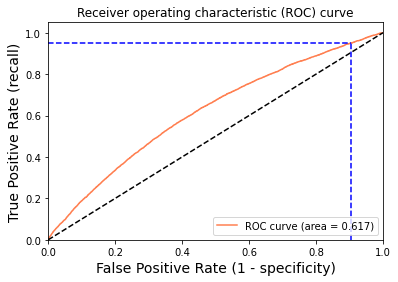

In [66]:
# Check key model metrics
# An ROC curve is a plot of True Positive Rate vs False Positive Rate where False 
# Positive Rate=FP/(TN+FP) = 1-Specificity

# Show the ROC_CURVE
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
y_pred_proba=log_reg_pred[:,1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

**AUROC** (Area Under the Receiver Operating Characteristics) The more the area enclosed by the ROC curve, the better it is. The area under the curve can lie between 0 and 1. The closer it is to 1, the better it is

### 7. Random Forest Model

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

In [68]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [69]:
rf_model_pred = rf_model.predict_proba(X_test)
y_pred_proba=rf_model_pred[:,1]
y_pred_proba

array([0.09610752, 0.08686816, 0.0645186 , ..., 0.14607009, 0.10738   ,
       0.10619262])

In [70]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\Users\ryany\AppData\Local\Temp/ipykernel_15484/2227196114.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
C:\Users\ryany\AppData\Local\Temp/ipykernel_15484/2227196114.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')


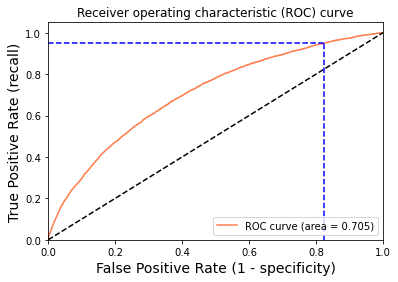

In [71]:
import numpy as np
y_pred_proba=rf_model_pred[:,1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

Random Forest Model performs much better than Logistic Regression Model